<a href="https://colab.research.google.com/github/Geek-a-Byte/2048/blob/master/lab2/teachers%20copy/MLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd

In [7]:
from zipfile import ZipFile
zipFileObject=ZipFile('/content/drive/MyDrive/CSE 442/homeprice_multiple_variables.zip')
zipFileObject.extractall('/tmp/dataset/')

In [8]:
dataFrame=pd.read_csv('/tmp/dataset/homeprices.csv', index_col=0)


In [9]:
dataFrame

,bedrooms,age,price
area,,,
2600,3.0,20,550000
3000,4.0,15,565000
3200,NaN,18,610000
3600,3.0,30,595000
4000,5.0,8,760000
4100,6.0,8,810000


In [10]:
dataFrame

,bedrooms,age,price
area,,,
2600,3.0,20,550000
3000,4.0,15,565000
3200,NaN,18,610000
3600,3.0,30,595000
4000,5.0,8,760000
4100,6.0,8,810000


In [11]:
dataFrame.isnull().sum()
bed_mean=dataFrame['bedrooms'].mean()
dataFrame['bedrooms']. fillna(bed_mean, inplace=True)


In [12]:
dataFrame.isnull().sum()

bedrooms    0
age         0
price       0
dtype: int64

In [13]:
dataFrame['bedrooms']

area
2600    3.0
3000    4.0
3200    4.2
3600    3.0
4000    5.0
4100    6.0
Name: bedrooms, dtype: float64

In [14]:
dataFrame


,bedrooms,age,price
area,,,
2600,3.0,20,550000
3000,4.0,15,565000
3200,4.2,18,610000
3600,3.0,30,595000
4000,5.0,8,760000
4100,6.0,8,810000


In [15]:
dataFrame.columns.str.match("Unnamed")
dataFrame.loc[:,~dataFrame.columns.str.match("Unnamed")]

,bedrooms,age,price
area,,,
2600,3.0,20,550000
3000,4.0,15,565000
3200,4.2,18,610000
3600,3.0,30,595000
4000,5.0,8,760000
4100,6.0,8,810000


In [16]:
X=dataFrame.iloc[:, :-1]
X


,bedrooms,age
area,,
2600,3.0,20
3000,4.0,15
3200,4.2,18
3600,3.0,30
4000,5.0,8
4100,6.0,8


In [17]:
y=dataFrame.iloc[:, 2]
y

area
2600    550000
3000    565000
3200    610000
3600    595000
4000    760000
4100    810000
Name: price, dtype: int64

In [18]:
X= dataFrame.drop(columns='price',axis=1)
X

,bedrooms,age
area,,
2600,3.0,20
3000,4.0,15
3200,4.2,18
3600,3.0,30
4000,5.0,8
4100,6.0,8


In [19]:
y= dataFrame['price']

In [21]:
X


,bedrooms,age
area,,
2600,3.0,20
3000,4.0,15
3200,4.2,18
3600,3.0,30
4000,5.0,8
4100,6.0,8


In [22]:
y

area
2600    550000
3000    565000
3200    610000
3600    595000
4000    760000
4100    810000
Name: price, dtype: int64

In [23]:
correlations = dataFrame.corr()

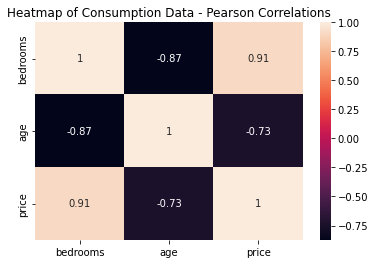

In [24]:
import seaborn as sns
sns.heatmap(correlations, annot=True).set(title='Heatmap of Consumption Data - Pearson Correlations');

In [25]:
column=np.array(dataFrame.columns)

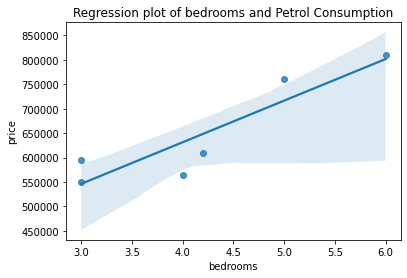

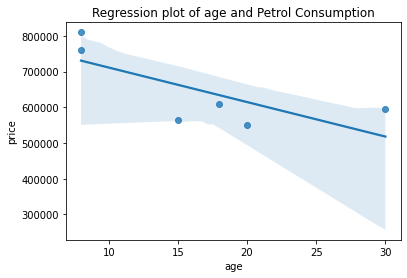

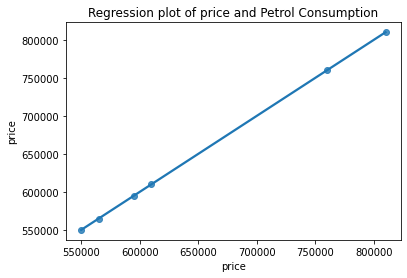

In [26]:
import matplotlib.pyplot as plt
for var in column:
    plt.figure()
    sns.regplot(x=var, y='price', data=dataFrame).set(title=f'Regression plot of {var} and Petrol Consumption');

In [27]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [30]:
regressor.fit(X_train, y_train)

LinearRegression()

In [31]:
y_pred = regressor.predict(X_test)

In [32]:
y_pred

array([652817.29518856, 672929.12873862])

In [33]:
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)

      Actual      Predicted
area                       
3200  610000  652817.295189
4000  760000  672929.128739


In [36]:
from zipfile import ZipFile
zipFileObject=ZipFile('/content/drive/MyDrive/CSE 442/width_height.zip')
zipFileObject.extractall('/tmp/dataset/')
dataFrame_wh=pd.read_csv('/tmp/dataset/weight-height.csv')


In [ ]:
dataFrame_wh

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


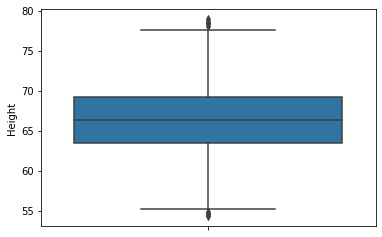

In [37]:
sns.boxplot(y=dataFrame_wh['Height'])

In [38]:
dataFrame_wh['code']= pd.factorize(dataFrame_wh['Gender'])[0]
dataFrame_wh['code']

0       0
1       0
2       0
3       0
4       0
       ..
9995    1
9996    1
9997    1
9998    1
9999    1
Name: code, Length: 10000, dtype: int64

In [39]:
pd.unique(dataFrame_wh['Gender'])
dataFrame_wh.Gender.nunique()

2

In [40]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
dataFrame_wh['gender_le']=le.fit_transform( dataFrame_wh['Gender'])
dataFrame_wh

,Gender,Height,Weight,code,gender_le
0,Male,73.847017,241.893563,0,1
1,Male,68.781904,162.310473,0,1
2,Male,74.110105,212.740856,0,1
3,Male,71.730978,220.042470,0,1
4,Male,69.881796,206.349801,0,1
...,...,...,...,...,...
9995,Female,66.172652,136.777454,1,0
9996,Female,67.067155,170.867906,1,0
9997,Female,63.867992,128.475319,1,0
9998,Female,69.034243,163.852461,1,0
